# Анализ оттока и привлечения  клиентов банка  «Метанпром»


## Задачи исследования

1.  **Изучение данных:**  
    * Загрузить файлы и посмотреть данные;
    * Посмотреть всю необходимую информацию по структуре дата сета;
    * Сделать предварительные выводы по качеству данных. 

1. **Предобработка данных:**
    * Найти и обработать пропуски и дубликаты в данных;
    * Заменить некорректные типы данных;
    * Заменить некорректные названия столбцов;
    * Написать пояснения к проделанным пунктам.
    * Посмотреть на аномалии в данных.
    * Создать новые столбцы для неупорядоченной категориальной переменной 'city'

1. **Исследовательский анализ данных**
    * Анализ харрактеристик отточных клиентов. Составление портрета для таких клиентов.
    * Анализ и портрет не отточных клиентов.
    * Поиск взаимосвязей между основными параметрами. Корреляционный анализ. Построение корреляционной матрицы.
    * Общие выводы по разделу

1. **Статистический анализ данных**
    * Формулировка и построение статистических гипотез:
        * Hазличия дохода между теми клиентами, которые ушли и теми, которые остались.
        * Гипотеза относительно представленных данных.

1. **Промежуточные выводы**        
    *  Определение  показателей больше всего влияющих на лояльность клиентов.
    * Определение критических значений или интервалов этих признаков связанных с оттоком. Нахождение доверительных интервалов для неооточных клиетнов.

1. **Сегментация пользователей**
    * Разработка и расчет бизнес метрики харрактеризующей ценность клиента.
    * Сегметрация пользователей на основе стратегически важных показателей. Выделение неотточных сегментов.
    * Приоритизация каждого из сегментов на основе разработанной метрики.
    * Выявление самого неотточного сегмента.

1. **Общие выводы**
    * Подведение итогов пректа.
    * Рекомендации по удержанию приоритетных сегментов.
    * Ссылки на презентацию и дашборд по проекту.

##  Описание данных

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.  
    

* **userid** — идентификатор пользователя,
* **score** — баллы кредитного скоринга,
* **City** — город,
* **Gender** — пол,
* **Age** — возраст,
* **equity** — приблизительная балльная оценка собственности клиента,
* **Balance**  — баланс на счёте,
* **Products** — количество продуктов, которыми пользуется клиент,
* **CreditCard** — есть ли кредитная карта,
* **last_activity** — был ли клиент активным за последний месяц,
* **estimated_salary** — оценочная заработная плата клиента,
* **Churn** — уходит или нет. (1-уходит, 0-нет)

# Изучение данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
#снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# ставим ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

# ставим стиль отображения графиков
#sns.set_style("darkgrid")

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

# задаем размер графика
#sns.set(rc={'figure.figsize':(9,5)})

In [3]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
df = pd.read_csv(path)


Посмотрим на структуру и информацию по датасету

In [4]:
#функция описывающая датасет
def all_df(df):
    display(df.sample(10))
    print("______________________________________________________")
    print(df.info())
    print("______________________________________________________")
    print("Пропущенных значений в столбцах")
    print(df.isna().sum())
    print("______________________________________________________")
    print(f'число дубликатов в "df":{df.duplicated().sum()}')
    print("______________________________________________________")
    print(f'процент пропущенных значений:',(df.isna().sum() / len(df)).round(2) * 100)

In [5]:
all_df(df)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
6268,210846,788.00,Ростов,Ж,49.00,4,"830,252.55",2,0,0,"91,192.35",0
2255,151270,719.00,Ярославль,М,67.00,0,NaN,1,1,0,"58,509.60",0
8033,116320,883.00,Рыбинск,Ж,39.00,4,"943,047.42",2,1,1,"192,925.33",0
875,168732,812.00,Ростов,Ж,55.00,3,"505,838.13",2,1,0,"24,184.43",0
9492,150497,840.00,Ярославль,Ж,39.00,4,"939,812.82",1,1,0,"122,184.92",0
2474,115624,895.00,Ярославль,М,28.00,0,NaN,1,1,1,"273,403.31",0
1038,158102,711.00,Ярославль,Ж,21.00,0,NaN,1,1,0,"81,648.72",0
5208,121663,733.00,Ярославль,М,33.00,0,NaN,1,1,0,"347,304.47",0
7787,139823,857.00,Ростов,М,39.00,2,"297,082.48",2,0,0,"78,213.47",1
2142,153431,812.00,Ярославль,Ж,43.00,5,"743,148.73",2,1,0,"46,397.48",0


______________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None
______________________________________________________
Пропущенных значений в столбцах
USERID              0
score               0
city                0

В столбце 'ballance' 23% значений пропущено. Нужно изучить природу этих пропусков и решить, что с ними делать.  
Теперь посмотрим на неявные дубликаты


In [6]:
df[df.duplicated(['USERID'])]

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
1583,190253,726.00,Ярославль,М,49.00,0,NaN,1,1,1,"177,700.78",0
1837,210662,896.00,Рыбинск,Ж,37.00,0,NaN,2,0,0,"90,916.04",0
2138,131419,739.00,Рыбинск,Ж,37.00,3,"1,307,941.65",3,0,0,"103,867.47",0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,"160,368.82",0
2302,220816,934.00,Рыбинск,Ж,74.00,5,"1,294,285.39",3,1,0,"95,606.80",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.00,Рыбинск,Ж,36.00,0,"73,574.07",2,0,1,"79,963.59",0
9785,168998,895.00,Рыбинск,М,44.00,0,"282,653.53",3,0,0,"255,296.47",0
9819,140934,832.00,Рыбинск,Ж,NaN,3,"385,763.16",2,0,1,"59,651.35",0
9880,217412,886.00,Ярославль,Ж,35.00,3,"1,026,172.14",2,1,0,"53,099.16",0


В данных обнаружено 73 дубликата по ID пользователей. Что бы решить как поступить с такими дублями посмотри на то как отличаются данные в других колонках на примере какого нибудь из пользователей.

In [7]:
(
    df.query('USERID == [210662, 190253, 131419, 140934]')
    .sort_values('USERID')
)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
904,131419,934.00,Ярославль,М,35.00,5,"2,348,335.95",2,0,0,"217,105.13",1
2138,131419,739.00,Рыбинск,Ж,37.00,3,"1,307,941.65",3,0,0,"103,867.47",0
4212,140934,919.00,Ярославль,Ж,29.00,4,"603,946.18",3,0,1,"158,438.79",0
9819,140934,832.00,Рыбинск,Ж,NaN,3,"385,763.16",2,0,1,"59,651.35",0
231,190253,823.00,Рыбинск,М,37.00,4,"373,348.39",2,0,1,"131,947.92",1
1583,190253,726.00,Ярославль,М,49.00,0,NaN,1,1,1,"177,700.78",0
869,210662,962.00,Ярославль,Ж,54.00,5,"5,069,231.39",1,1,1,"955,144.85",1
1837,210662,896.00,Рыбинск,Ж,37.00,0,NaN,2,0,0,"90,916.04",0


Похоже на то, что произошел какой то сбой и в разных городах есть клиенты с одинаковым ID либо данные по нему внесены не корректно, так как вся остальная информация у таких клиентов значительно отличается. Врядли эта ошибка нам как то помешает, поэтому оставим как есть.

**Выводы**
* В датасете представлена информация о 10000 уникальных пользователей;
* Необходимо для удобства переименовать и привести в нижний регистр названия некоторых столбцов;
* В двух столбцах имеются пропуски;
* Были обнаружены дубликаты по ID пользователей(73 шт). 
* В 'score' и 'age' можно заменить тип данных на целочисленный.

# Предобработка данных

Разберемся с названиями столбцов

In [8]:

df.columns = df.columns.str.lower()

In [9]:
df.rename(columns = {'userid':'user_id', 'est_salary':'estimated_salary'}, inplace = True )
df.columns.tolist()

['user_id',
 'score',
 'city',
 'gender',
 'age',
 'equity',
 'balance',
 'products',
 'credit_card',
 'last_activity',
 'estimated_salary',
 'churn']

В столбце с балансом есть 2295 пропущенных значений, это весьма много (~23%) Попробуем разобраться с ними.

In [10]:
df['balance'].describe()

count         7,705.00
mean        827,794.31
std       1,980,614.15
min               0.00
25%         295,554.16
50%         524,272.20
75%         980,705.85
max     119,113,552.01
Name: balance, dtype: float64

In [11]:
no_balance = df[df['balance'].isnull()]
no_balance.sample(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn
4870,197364,889.00,Ярославль,М,33.00,0,NaN,2,1,1,"96,173.48",0
3321,122904,913.00,Ярославль,Ж,28.00,0,NaN,1,1,1,"94,307.04",0
2327,186521,894.00,Ярославль,Ж,65.00,0,NaN,1,0,1,"88,722.64",0
2488,169127,886.00,Рыбинск,М,39.00,0,NaN,1,1,0,"228,593.68",0
1961,178072,924.00,Ростов,М,40.00,0,NaN,1,0,1,"157,513.25",0
9587,198859,935.00,Ярославль,Ж,47.00,0,NaN,1,1,0,"222,439.51",0
8979,152754,904.00,Ростов,Ж,49.00,0,NaN,1,0,1,"244,204.28",0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,"196,898.29",0
9368,182430,911.00,Рыбинск,Ж,57.00,0,NaN,1,0,1,"107,461.47",0
6493,201254,742.00,Ярославль,Ж,60.00,0,NaN,1,1,0,"250,199.90",0


In [12]:
no_balance.groupby('churn').agg({'user_id':'count'})

,user_id
churn,
0,2282
1,13


In [13]:
df.query('balance == balance').groupby('churn').agg({'user_id':'count'})

,user_id
churn,
0,5898
1,1807


Большая часть людей с отсутствующим балансам являются действующими клиентами, хотя есть 13 человек, которые ушли из банка. В строках без прропусков отток гораздо выше.

In [14]:
print('число пользователей по городам с пропусками в балансе и по наличию кредитной карты')
display(no_balance.groupby(['city', 'credit_card']).agg({'user_id':'count'}))
print('число пользователей по городам ,без пропусков в балансе и по наличию кредитной карты')
display(df.query('balance == balance').groupby(['city', 'credit_card']).agg({'user_id':'count'}))

число пользователей по городам с пропусками в балансе и по наличию кредитной карты


user_id
city      credit_card         
Ростов    0                 86
          1                149
Рыбинск   0                141
          1                452
Ярославль 0                196
          1               1271

число пользователей по городам ,без пропусков в балансе и по наличию кредитной карты


user_id
city      credit_card         
Ростов    0                527
          1                655
Рыбинск   0                824
          1               1278
Ярославль 0               1422
          1               2999

Более половины пользователей с пропусками в данных из Ярославля. Однако по сторокам с не пропущенными данными видно, что в принципе большинство клиентов от туда, большой город - много клиентов. Связать пропуски с городом нельзя.

In [15]:
no_balance.query('products > 1')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn
30,155730,946.00,Ярославль,Ж,47.00,0,NaN,2,1,1,"660,015.85",0
34,205226,944.00,Ярославль,М,35.00,0,NaN,2,1,1,"239,843.39",0
52,214266,888.00,Ярославль,Ж,37.00,0,NaN,2,0,0,"149,164.44",0
57,167752,914.00,Ростов,Ж,58.00,0,NaN,2,1,0,"116,651.71",0
59,227642,930.00,Ярославль,Ж,36.00,0,NaN,2,1,0,"359,081.73",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9860,192954,723.00,Ярославль,Ж,49.00,0,NaN,2,1,1,"221,807.39",0
9890,152897,747.00,Рыбинск,М,40.00,0,NaN,2,1,0,"330,378.35",0
9895,207537,889.00,Ярославль,М,45.00,0,NaN,2,1,0,"177,006.67",0
9969,123120,910.00,Ярославль,Ж,64.00,0,NaN,2,1,1,"165,340.00",0


 Так же многие являются исключительно держателями кредитных карт(больше никаких продуктов нет), хотя есть 344 пользователя с более чем 1 продуктом. Можно сделать предположение, что данные отсутствуют у держателей кредиток, а так же у тех, у кого отсутствует дебетовая карта, и возможно система не распознает данные. Но посмотрим насколько пропуски действительно зависят от наличия кредитной карты.

In [16]:
#dataframe[‘first_column’].corr(dataframe[‘second_column’])
print('корреляция пропусков с наличием кредитной карты',
      round(df['balance'].isnull().corr(df['credit_card']), 2))
print('корреляция пропусков с баллами скоринга',
      round(df['balance'].isnull().corr(df['score']), 2))
print('корреляция пропусков с заработной платой',
      round(df['balance'].isnull().corr(df['estimated_salary']), 2))
print('корреляция пропусков с балами собственности',
      round(df['balance'].isnull().corr(df['equity']), 2))

корреляция пропусков с наличием кредитной карты 0.16
корреляция пропусков с баллами скоринга 0.14
корреляция пропусков с заработной платой 0.31
корреляция пропусков с балами собственности -0.71


Мы видем что у пропусков сильная обратная корреляция с баллами собственности клиентов, и что сила корреляции c наличием кредитки и скорингом очень слабая, с заработной платой умеренная, но не достаточно большая что бы утверждать четкую взаимосвязь. Создадим отдельный столбец показывающий отсутствует баланс (1) или нет (0) и посмотрим на количество баллов с отсутствующим балансом.

In [17]:
def no_balance(balance):
    if balance == balance:
        return 0
    else:
        return 1 

In [18]:
df['no_balance'] = df['balance'].apply(no_balance)
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn,no_balance
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0,1
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1,0


In [19]:
df.groupby('equity').agg({'no_balance':'mean'})

,no_balance
equity,
0,0.84
1,0.15
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00
7,0.00
8,0.00


У 84% из пользователей с нулевым  баллом не указаны данные по балансу. Скорей всего пропуски связаны именно с этой харрактеристикой, но распределены случайным образом. Так как замена их на какие либо значения сильно исказит наши данные, оставим их как есть.

Так же есть пропуски в столбце с возрастом, их мы восстановить не можем. Так как пропусков не много менее 1%(26 значений) удалим их.

In [20]:
df.dropna(axis = 'index', subset = ['age'], inplace = True)
#убедимся что из нет
df.age.isna().sum()

0

Посмотрим на распределение заработной платы

In [21]:
df['estimated_salary'].describe()

count       9,974.00
mean      147,786.81
std       139,285.51
min         2,546.30
25%        75,251.66
50%       119,626.79
75%       174,499.81
max     1,395,064.45
Name: estimated_salary, dtype: float64

Видно что есть зп значительно меньше прожиточного минимума. По Ярославской области региональная величина прожиточного минимума на 2022 год 13085 рублей на человека, в том числе для трудоспособного населения – 14263, для пенсионеров – 11253 и для детей – 12718 рублей в среднем. По Ростовской немного меньше – 11 895 рублей, для трудоспособного населения – 12 966 рублей, пенсионеров – 10 230 рублей, детей – 12 108 рублей.
Посмотрим на людей с зарплатой меньше 12000.

In [22]:
df.query('estimated_salary < 12000')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn,no_balance
443,207658,875.00,Ярославль,Ж,76.00,5,"676,450.87",3,0,1,"11,319.50",0,0
505,205035,725.00,Рыбинск,Ж,77.00,3,73.00,2,0,1,"8,729.84",0,0
1520,207521,819.00,Рыбинск,М,63.00,4,"597,930.59",2,0,1,"10,677.73",0,0
1700,155567,747.00,Ростов,М,25.00,0,"5,750.92",1,1,0,"7,054.82",0,0
1753,161271,836.00,Ярославль,Ж,19.00,4,"7,703.05",4,1,1,"5,043.14",0,0
1883,151268,852.00,Ростов,Ж,63.00,5,"373,070.37",1,1,1,"8,587.79",0,0
1988,160979,788.00,Рыбинск,М,24.00,4,"118,438.82",2,1,0,"8,401.97",0,0
2174,143340,830.00,Ярославль,Ж,72.00,2,"294,375.63",3,1,1,"8,032.18",0,0
2186,201407,938.00,Рыбинск,Ж,69.00,1,"325,483.52",3,0,1,"3,487.33",0,0
2663,140105,821.00,Ростов,Ж,75.00,7,"631,805.72",1,1,0,"8,894.57",0,0


Все клиенты кроме одного действующие. Так же у многих весьма солидный баланс на карте и хорошие кредитные баллы. Но так как это результат расчета модели, которая учитывает любой регулярный доход значения тоже могут быть очень разными.

Создадим отдельные столбцы для работы с категориальными переменными('city' и 'gender'). Для этого используем унитарное кодирование (One Hot Encoding), таким способом значения не будут взвешиваться не правильно. Применим метод get_dummies библиотеки pandas.

In [23]:
df = pd.get_dummies(df, columns=['city'], dtype=int)
df.rename(columns = {'city_Ростов':'Rostov', 'city_Рыбинск':'Rybinsk','city_Ярославль':'Yaroslavl'}, inplace = True )
df.head()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn,no_balance,Rostov,Rybinsk,Yaroslavl
0,183012,850.00,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1,0,0,1,0
1,146556,861.00,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0,0,0,1,0
2,120722,892.00,Ж,30.00,0,NaN,1,1,1,"107,683.34",0,1,0,1,0
3,225363,866.00,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,0,1
4,157978,730.00,М,34.00,5,174.00,1,1,0,"67,353.16",1,0,0,0,1


In [24]:
df = pd.get_dummies(df, columns=['gender'], dtype=int)

В столбцах score и age заменим тип данных на целочисленный.

In [25]:
df[['score','age']] = df[['score','age']].astype(int)
df.rename(columns = {'gender_Ж':'female', 'gender_М':'male'}, inplace = True )
df.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn,no_balance,Rostov,Rybinsk,Yaroslavl,female,male
0,183012,850,25,1,"59,214.82",2,0,1,"75,719.14",1,0,0,1,0,1,0
1,146556,861,37,5,"850,594.33",3,1,0,"86,621.77",0,0,0,1,0,1,0
2,120722,892,30,0,NaN,1,1,1,"107,683.34",0,1,0,1,0,1,0
3,225363,866,51,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,0,1,1,0
4,157978,730,34,5,174.00,1,1,0,"67,353.16",1,0,0,0,1,0,1


In [26]:
df.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn,no_balance,Rostov,Rybinsk,Yaroslavl,female,male
0,183012,850,25,1,"59,214.82",2,0,1,"75,719.14",1,0,0,1,0,1,0
1,146556,861,37,5,"850,594.33",3,1,0,"86,621.77",0,0,0,1,0,1,0
2,120722,892,30,0,NaN,1,1,1,"107,683.34",0,1,0,1,0,1,0
3,225363,866,51,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,0,1,1,0
4,157978,730,34,5,174.00,1,1,0,"67,353.16",1,0,0,0,1,0,1


In [27]:
df.dtypes

user_id               int64
score                 int64
age                   int64
equity                int64
balance             float64
products              int64
credit_card           int64
last_activity         int64
estimated_salary    float64
churn                 int64
no_balance            int64
Rostov                int64
Rybinsk               int64
Yaroslavl             int64
female                int64
male                  int64
dtype: object

**Выводы по разделу**
* Были исправлены названия столбцов;
* Убраны пропуски;
* Так же обнаружились аномально низкие значения зп.
* Большая часть людей у которых неуказаны те или иные данные или с нетипичными данными являются действующими клиентами банка.
* При помощи унитарного кодирования создали новые столбцы по 'city'.
* Заменили тип данных в некоторых столбцах.

# Исследовательский анализ данных

Проведем исследовательский аназ данных что бы понять какие клиенты являются отточными, а какие нет.

## Оценка баллов собственности

Посмотрим как распределяются уходящие клиенты в зависимости от того во сколько баллов оценивается их собственность.

In [28]:
#таблица доли ушедших пользователей в зависимости от баллов собственности
churn_equity = df.groupby('equity').agg({'user_id':'count','churn':'sum'})
churn_equity['shere'] = churn_equity['churn'] / churn_equity['user_id'] * 100
churn_equity.rename(columns = {'user_id':'count','churn':'count_of_cherned'}, inplace = True)
churn_equity.reset_index()

,equity,count,count_of_cherned,shere
0,0,2576,90,3.49
1,1,773,93,12.03
2,2,1051,166,15.79
3,3,1541,322,20.90
4,4,1847,464,25.12
5,5,1915,576,30.08
6,6,161,58,36.02
7,7,80,37,46.25
8,8,17,6,35.29
9,9,13,7,53.85


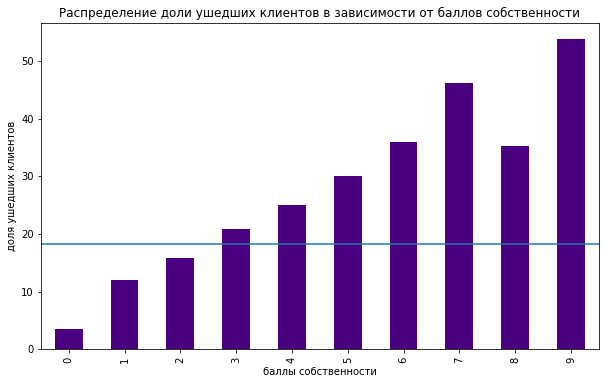

In [29]:
#посмотрим гистограмму
churn_equity['shere'].plot(x='equity', y='shere',kind='bar', color='indigo', figsize=(10, 6))
plt.xlabel('баллы собственности')
plt.ylabel('доля ушедших клиентов')
plt.title('Распределение доли ушедших клиентов в зависимости от баллов собственности')
plt.axhline(churn_equity['count_of_cherned'].sum()/churn_equity['count'].sum()*100)
plt.show()


Видно, что в процентном соотношении уходит больше всего клиентов с более высокими баллами собственности (7 и 8) однако, если брать не относительные величины, то видно, что таких клиентов в принципе не много, но странно что их удержание столь низкое. В целом наблюдается почти прямая зависимость, чем больше баллов собственности, тем больше доля ушедших клиентов. Если брать во снимание средний отток по сегменту, то можно выделить наиболее не отточные группы с колидеством продуктов равном или меньше 2х 

## Оценка количества используемых продуктов

In [30]:
#таблица доли ушедших пользователей в зависимости от количества продуктов
churn_products = df.groupby('products').agg({'user_id':'count','churn':'sum'})
churn_products['shere'] = churn_products['churn'] / churn_products['user_id'] * 100
churn_products.rename(columns = {'user_id':'count','churn':'count_of_cherned'}, inplace = True)
churn_products.reset_index()

,products,count,count_of_cherned,shere
0,0,1,1,100.00
1,1,3323,235,7.07
2,2,5119,978,19.11
3,3,1038,297,28.61
4,4,474,300,63.29
5,5,19,8,42.11


Видно что есть один пользователь с 0 количеством продуктов, так как такой клиент всего один, видимо в данных аномалия удалим его, что бы не искажал графики и расчеты.

In [31]:
df = df[df.products != 0]


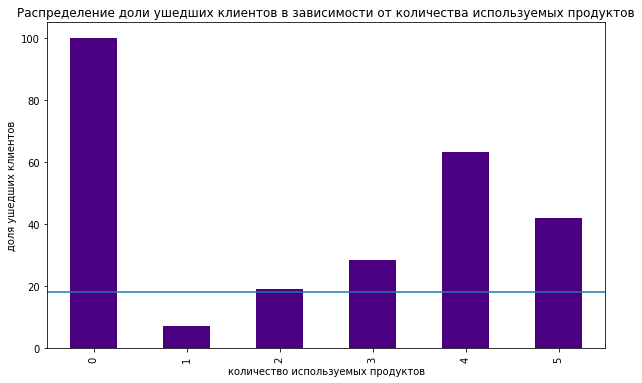

In [32]:
#посмотрим гистограмму
churn_products['shere'].plot(x='products', y='shere',kind='bar', color='indigo', figsize=(10, 6))
plt.xlabel('количество используемых продуктов')
#plt.xlim(0.5, 5.5)
plt.ylabel('доля ушедших клиентов')
plt.title('Распределение доли ушедших клиентов в зависимости от количества используемых продуктов')
plt.axhline(churn_products['count_of_cherned'].sum()/churn_products['count'].sum()*100)
plt.show()

Более 60% людей использующих 4 продукта уходят. Хотя опять таки количество людей пользующихся более чем 3 продуктами не велико, почему-то уходят они гораздо чаще. Ниже среднего оттока сегмент с 1 продуктом. 

## Оценка возраста пользователей

Посмотрим как распределяется доля ушедших пользователей в зависимотри от возраста. Для этого сигментируем на несколько возрастных групп.

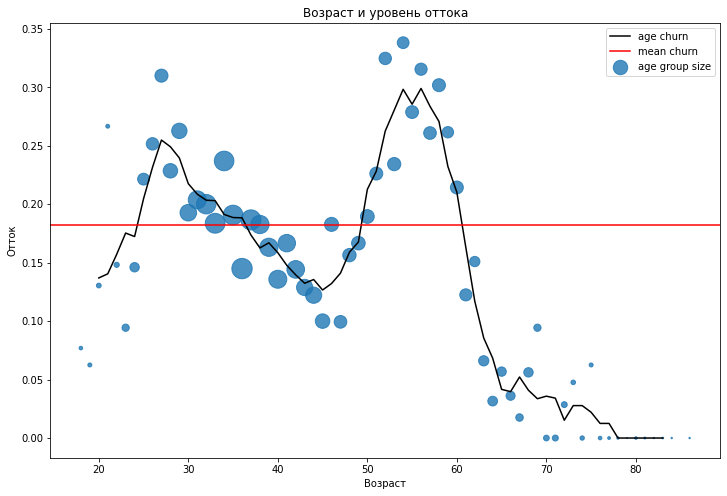

In [33]:
def plot_churn(df,col,name,step=5,xlim=None,ylim=None):
    fig = plt.figure(figsize=(12,8))
    
    col_churn = df.assign(temp_col = (df[col] // step) * step).groupby('temp_col').agg({"churn":["count","mean"]}).droplevel(0,1)
    plt.scatter(col_churn.index,col_churn['mean'],s=col_churn['count'],alpha=.8,label=f'{col} group size')
    plt.plot(col_churn.index,col_churn['mean'].rolling(5,center=True).mean(),c="k",label=f'{col} churn')
    plt.axhline(df.churn.mean(),c='r',label='mean churn')
    plt.xlim(xlim); plt.ylim(ylim); plt.ylabel("Отток"); plt.xlabel(name)
    plt.title(f"{name} и уровень оттока"); plt.legend()

plot_churn(df,"age","Возраст",1)

Самыми отточными являются  клиенты в возрасте примерно от 25 до 38 и 50-60 лет. А не отточный хороший сегмент 38-50. Посмотрим так же на гистограмму с плотностью вероятности отточных и не отточных клиентов.

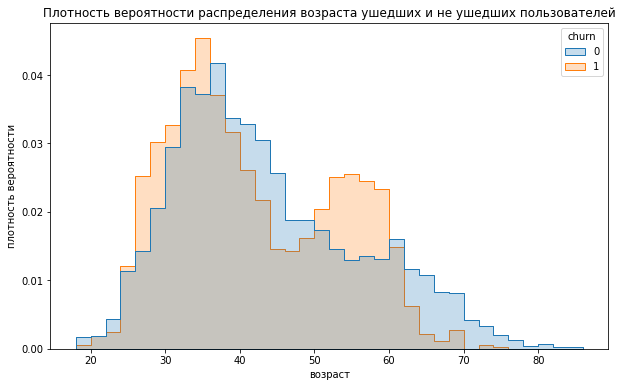

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(
    df.query('age > 0'), x="age", hue="churn", element="step", stat='density',
    common_norm=False, binwidth=2
)
plt.xlabel('возраст')
plt.ylabel('плотность вероятности')
plt.title('Плотность вероятности распределения возраста ушедших и не ушедших пользователей')
plt.show()

Посмотри на распределение полов в неотточном сегменте.

In [35]:
df.query(' 38 < age < 50 and churn == 0').groupby('female').agg({'user_id':'count'})

,user_id
female,
0,1178
1,1162


Мужчин и женщин в данной возрастной группе почти поровну.

## Оценка баланса

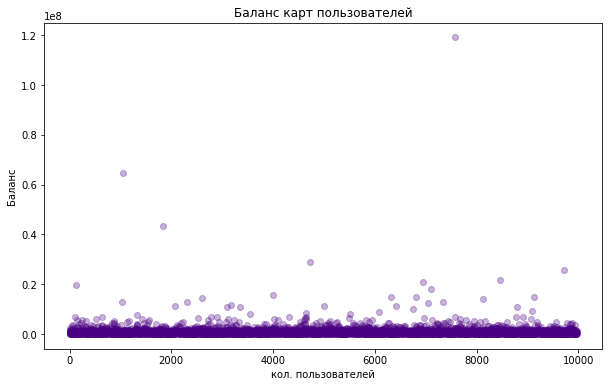

In [36]:
plt.figure(figsize=(10,6))
x_values = pd.Series(range(0,len(df['user_id'])))
plt.scatter(x_values, df['balance'], color='indigo', alpha=0.3)

plt.title('Баланс карт пользователей')
plt.xlabel('кол. пользователей')
plt.ylabel('Баланс')
plt.show()

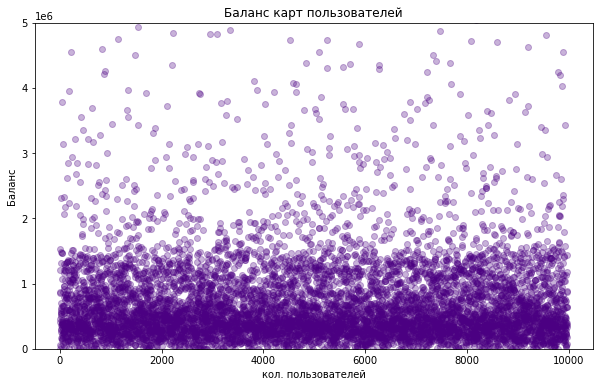

In [37]:
plt.figure(figsize=(10,6))
x_values = pd.Series(range(0,len(df['user_id'])))
plt.scatter(x_values, df['balance'], color='indigo', alpha=0.3)

plt.title('Баланс карт пользователей')
plt.xlabel('кол. пользователей')
plt.ylabel('Баланс')
plt.ylim(0, 5000000)
plt.show()

Видно, что у большинства клиентов баланс не превышает 1,5 мл самое плотное распределение в районе 300 тысяч. Но так как пользователи с большим балансом для банка важны, что бы не потерять их условно приравняем их баланс к 2 миллионам  выделив таким образом VIP клиентов и создадим новый столбец.

In [38]:
# создадим функцию для приравнивания больших ссум:

def norm_balance(balance):
    if balance <= 2000000:
        return balance
    if balance > 2000000 :
        return 2000000
   

In [39]:
df['vip'] = df['balance'].apply(norm_balance)
df

,user_id,score,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn,no_balance,Rostov,Rybinsk,Yaroslavl,female,male,vip
0,183012,850,25,1,"59,214.82",2,0,1,"75,719.14",1,0,0,1,0,1,0,"59,214.82"
1,146556,861,37,5,"850,594.33",3,1,0,"86,621.77",0,0,0,1,0,1,0,"850,594.33"
2,120722,892,30,0,NaN,1,1,1,"107,683.34",0,1,0,1,0,1,0,NaN
3,225363,866,51,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,0,1,1,0,"1,524,746.26"
4,157978,730,34,5,174.00,1,1,0,"67,353.16",1,0,0,0,1,0,1,174.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,27,1,"78,144.65",1,0,1,"18,943.64",0,0,0,1,0,0,1,"78,144.65"
9996,139170,894,46,0,NaN,1,1,0,"196,898.29",0,1,0,0,1,0,1,NaN
9997,115639,903,24,0,NaN,2,1,1,"108,905.09",0,1,0,0,1,0,1,NaN
9998,148700,777,68,3,"865,457.97",3,0,1,"86,874.90",0,0,0,0,1,1,0,"865,457.97"


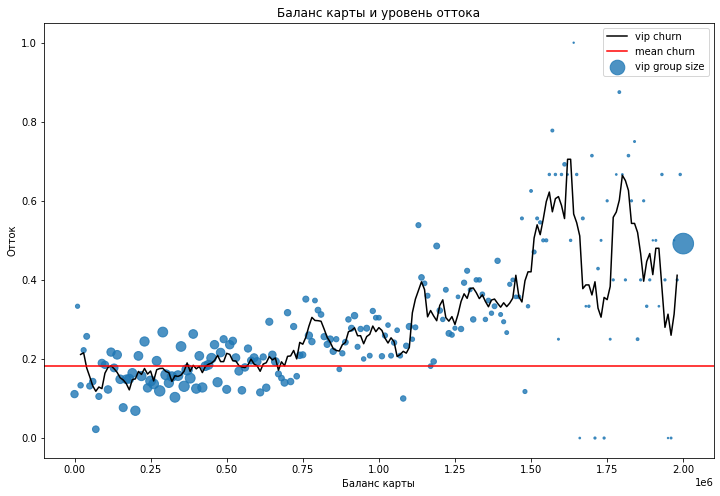

In [40]:
plot_churn(df,"vip","Баланс карты",10000)

Чем больше баланс, тем меньше таких клиентов. Преобладают клиенты с болансом примерно 100-750 тысяч. Однако чем он выше тем пользователи почему то более склонны уходить.Самый не ооточный сегмент с баллансом примерно до 370 тясяч.

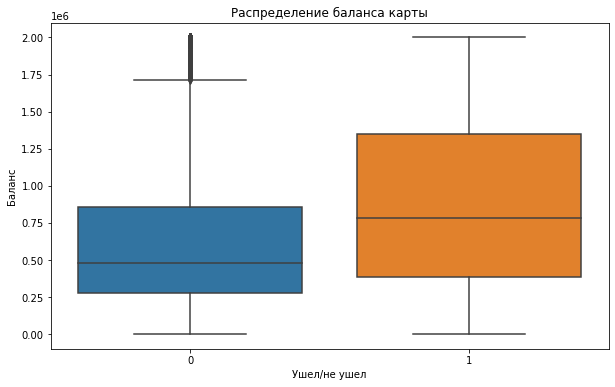

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='churn', y='vip');
plt.xlabel('Ушел/не ушел')
plt.ylabel('Баланс')
plt.title('Распределение баланса карты')
plt.show()

Действительно для ушедших пользоватей свойственен более высокий баланс.

## Оценка баллов скоринга

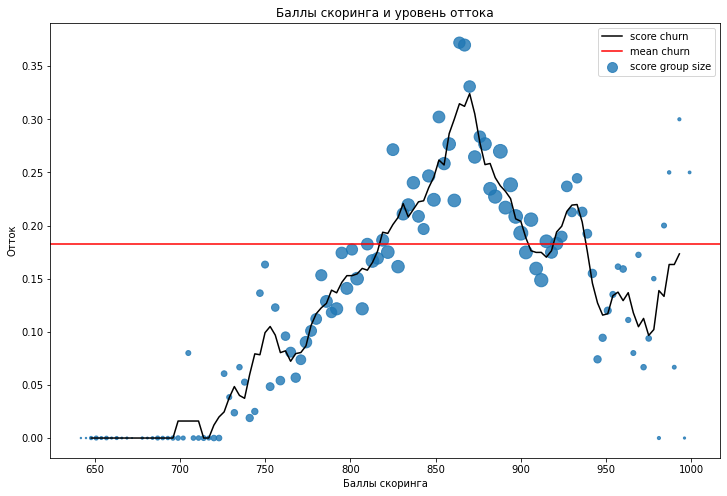

In [42]:
plot_churn(df,"score","Баллы скоринга",3)

Видно что чаще всего уходят пользователи с баллами от 850 до 900, здесь вероятность оттока значительно выше. У неотточных пользователей скоринг находится до 850.

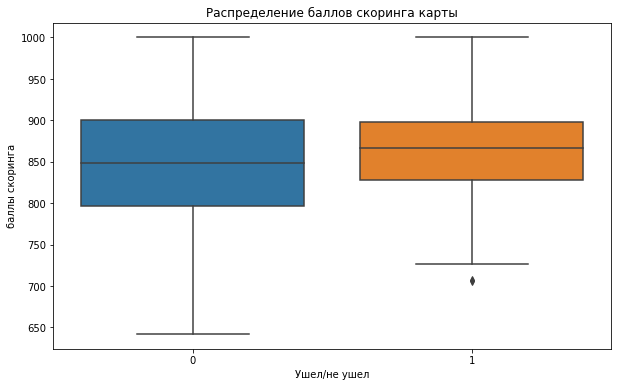

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='churn', y='score');
plt.xlabel('Ушел/не ушел')
plt.ylabel('баллы скоринга')
plt.title('Распределение баллов скоринга карты')
plt.show()

Видно что медианы распределения не сильно отличаются, а вот пороговые значения у действующих клиентов ниже. Получается, что чем меньше баллов, тем вероятнее клиент останется с банком.

## Оценка активности

,sum,count,shere
last_activity,,,
0,541,4758,11.37
1,1277,5215,24.49


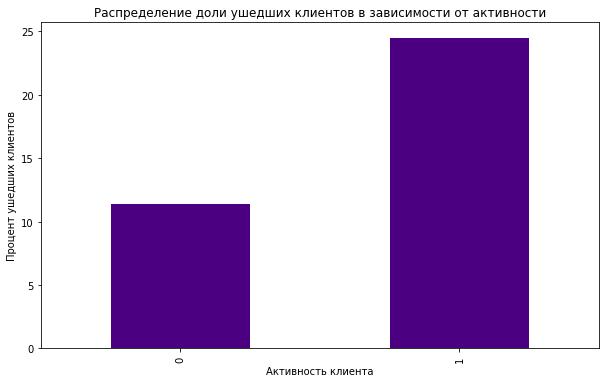

In [44]:
activity_churn = df.pivot_table(index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count'])
activity_churn.columns = activity_churn.columns.droplevel(level=1)
activity_churn['shere'] = activity_churn['sum'] / activity_churn['count'] * 100


activity_churn['shere'].plot(
    kind='bar', title = 'Распределение доли ушедших клиентов в зависимости от активности', figsize = (10,6), 
    ylabel = 'Процент ушедших клиентов', xlabel = 'Активность клиента',color='indigo');

activity_churn

Видно что почти в 2 раза чаще уходят активные клиенты. Так же можно сказать что по всему дата сету общее число активных и не активных не сильно разничается (52% и 47%). Видимо активные сталкиваются с какими то определенными недовольствами и принимают чеще решение об уходе.

## Оценка половой принадлежности

In [45]:
#таблица доли ушедших пользователей в зависимости от баллов собственности
gender_churn = df.groupby('female').agg({'user_id':'count','churn':'sum'})
gender_churn['shere'] = gender_churn['churn'] / gender_churn['user_id'] * 100
gender_churn.rename(columns = {'user_id':'count','churn':'count_of_cherned'}, inplace = True)
gender_churn.reset_index()

,female,count,count_of_cherned,shere
0,0,4991,1183,23.70
1,1,4982,635,12.75


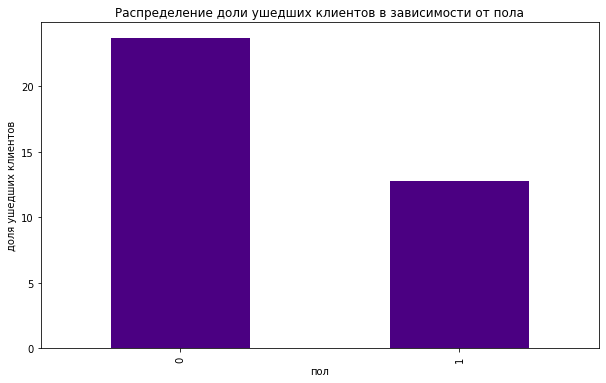

In [46]:
#посмотрим гистограмму
gender_churn['shere'].plot(x='female', y='shere',kind='bar', color='indigo', figsize=(10, 6))
plt.xlabel('пол')
plt.ylabel('доля ушедших клиентов')
plt.title('Распределение доли ушедших клиентов в зависимости от пола')

plt.show()

Большая часть ушедших клиентов мужского пола. Хотя изначально по половому признаку данные делятся почти поровну (мужчин в датасете на 10 больше).

## Оценка заработной платы

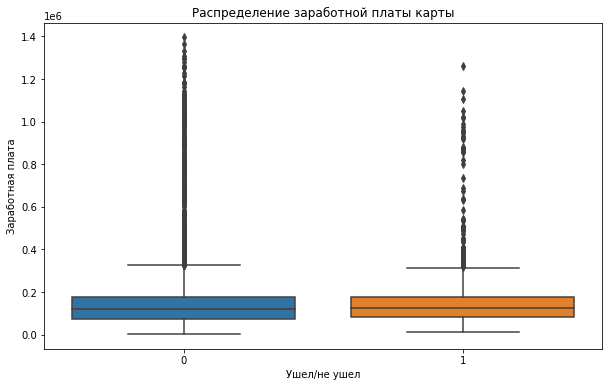

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='churn', y='estimated_salary');
plt.xlabel('Ушел/не ушел')
plt.ylabel('Заработная плата')
plt.title('Распределение заработной платы карты')
plt.show()

По графикам видно, что как и с суммой на счете очень большое количество выбросов из за которых сложно смотреть графики. Поступим так же как в прошлый раз все что превышает 4млн приравняем к ним.

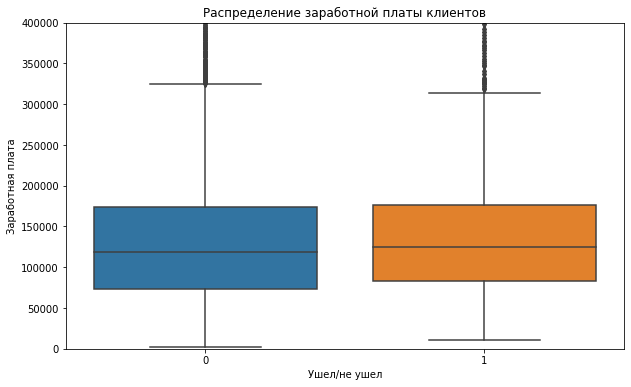

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='churn', y='estimated_salary');
plt.xlabel('Ушел/не ушел')
plt.ylabel('Заработная плата')
plt.title('Распределение заработной платы клиентов')
plt.ylim(0, 400000)
plt.show()

Теперь сравнивать графики легче. Видно что медианное значение у ушедших пользователей немного выше. Посмотрим теперь на то, с какой зарплатой люди вероятнее уходят.

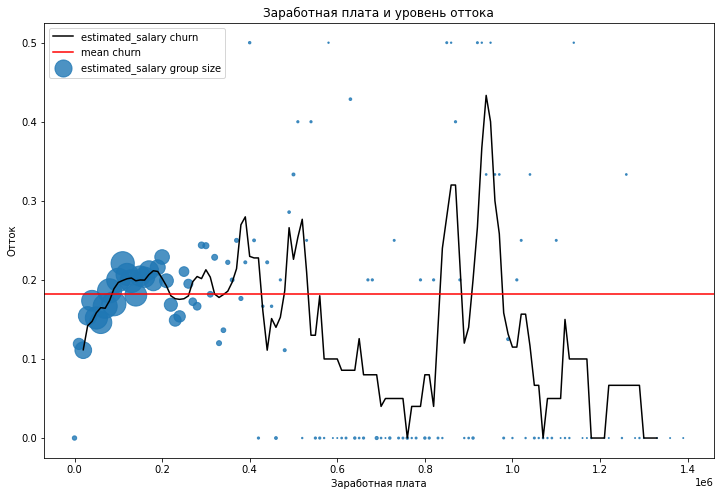

In [49]:
plot_churn(df,"estimated_salary","Заработная плата",10000)
#plt.xlim(0, 1000000)

Больше всего клиентов с зарплатой до 200 тысяч. У большинства не отточных зарплата ниже 100, но так же есть доля не отточных клиентов с зарплптой 550 - 850 тысяч рублей и более миллиона.

## Оценка наличия банковской карты

In [50]:
df.groupby(['churn','credit_card']).agg({'user_id':'count'})

user_id
churn credit_card         
0     0               2374
      1               5781
1     0                815
      1               1003

,sum,count,shere
credit_card,,,
0,815,3189,25.56
1,1003,6784,14.78


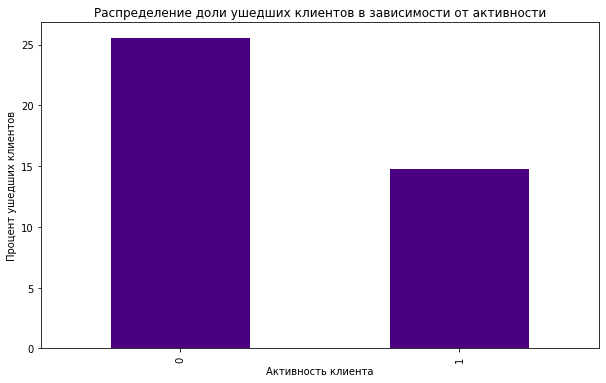

In [51]:
credit_churn = df.pivot_table(index = 'credit_card', values = 'churn', aggfunc = ['sum', 'count'])
credit_churn.columns = credit_churn.columns.droplevel(level=1)
credit_churn['shere'] = credit_churn['sum'] / credit_churn['count'] * 100


credit_churn['shere'].plot(
    kind='bar', title = 'Распределение доли ушедших клиентов в зависимости от активности', figsize = (10,6), 
    ylabel = 'Процент ушедших клиентов', xlabel = 'Активность клиента',color='indigo');

credit_churn

Среди пользователей не имеющих кредитной карты вероятность ухода больше

## Корреляционный анализ

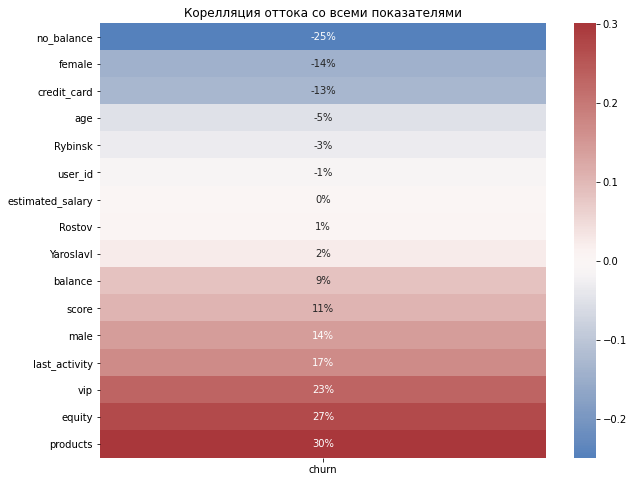

In [52]:
#создадим переменную с корреляционной матрицей
df_corr = df.corr()
#визуализируем
plt.figure(figsize=(10,8))
sns.heatmap(df_corr.loc[:,['churn']].drop('churn').sort_values('churn'),
            annot=True, fmt='.0%', cmap='vlag',center=0)
plt.title('Корелляция оттока со всеми показателями')
plt.show()

Из корреляционной матрицы видно что только в колличестве продуктов корреляция умеренная. У всех остальных параметров она слабая. Низкая корреляции при наличии причинной связи может быть в связи с тем, что связь не линейна или действуют другие факторы мешающие проявиться зависимости. Примим во внимание параметры со значением больше 10%, меньшее можно считать шумом.  
Больше всего на отток влияют количество используемых продуктов, баллы собственности и присутствие баланса на карте. Меньшее влияние оказывают активность, пол, наличие кредитки и  скорринг.

## Составление портрета не отточных пользователей

Из полученных при анализе данных можно составить следующий портрет не отточных клиентов.

* Баллы собственности - до 2х
* Количество используемых продуктов - 1
* Возраст - 38-50 и 60+
* Баланс карты - до 370
* Скоринг - до 850
* Пол - более лояльны женщины
* Зарплата - ниже 100 тысяч, 550-850 и более миллиона
* Кредитная карта - есть    

**Посмотрим так же на портреты типичных отточных и не отточных клиентов**

**Отточные клиенты**

In [53]:
print('Баллы собственности',
      round(df.query('churn == 1')['equity'].mean()))
print('Количество используемых продуктов',
     round(df.query('churn == 1')['products'].mean()))
print('Возраст',
     round(df.query('churn == 1')['age'].mean()))
print('Баланс счета',
     round(df.query('churn == 1')['balance'].median()))
print('Баллы скоринга',
     round(df.query('churn == 1')['score'].mean()))
print('Мужчины',
     round(df.query('churn == 1')['male'].sum() / df.query('churn == 1')['male'].count() *100, 2),'%')
print('Женщины',
      round(df.query('churn == 1')['female'].sum() / df.query('churn == 1')['female'].count() *100, 2),'%')
print('Зарплата',
     round(df.query('churn == 1')['estimated_salary'].median()))
print('Кредитная карта есть у',
     round(df.query('churn == 1')['credit_card'].sum() / df.query('churn == 1')['credit_card'].count() *100, 2),'%')

Баллы собственности 4
Количество используемых продуктов 2
Возраст 41
Баланс счета 783909
Баллы скоринга 863
Мужчины 65.07 %
Женщины 34.93 %
Зарплата 125409
Кредитная карта есть у 55.17 %


**Не отточные клиенты**

In [54]:
print('Баллы собственности',
      round(df.query('churn == 0')['equity'].mean()))
print('Количество используемых продуктов',
     round(df.query('churn == 0')['products'].mean()))
print('Возраст',
     round(df.query('churn == 0')['age'].mean()))
print('Баланс счета',
     round(df.query('churn == 0')['balance'].median()))
print('Баллы скоринга',
     round(df.query('churn == 0')['score'].mean()))
print('Мужчины',
     round(df.query('churn == 0')['male'].sum() / df.query('churn == 0')['male'].count() *100, 2),'%')
print('Женщины',
      round(df.query('churn == 0')['female'].sum() / df.query('churn == 0')['female'].count() *100, 2),'%')
print('Зарплата',
     round(df.query('churn == 0')['estimated_salary'].median()))
print('Кредитная карта есть у',
     round(df.query('churn == 0')['credit_card'].sum() / df.query('churn == 0')['credit_card'].count() *100, 2),'%')

Баллы собственности 2
Количество используемых продуктов 2
Возраст 43
Баланс счета 475410
Баллы скоринга 845
Мужчины 46.7 %
Женщины 53.3 %
Зарплата 118228
Кредитная карта есть у 70.89 %


По портретам типичных пользователей видно, что больше всего отличаются баллы собственности, баллы скоринга ниже у не отточных, распределение по половому признаку так же отличается, зарплата и наличие банковской карты.

# Статистический анализ данных

## Гипотеза 1.

Проверим как влияет  степень дохода на отток клиентов. Для этого сформулируем гипотезы: 
  
**Н0** Раздницы в среднем размере дохода между отточными и не отточными клиентами нет.  
**H1** Раздница в средних доходах отточных и не отточных есть.  

Для начала проверим гипотезы с помощью критерия Стьюдента

In [55]:
#churn = df.['churn'] == 1
#no_churn = df['churn'] == 0

results = (st.ttest_ind(df.query('churn == 1')['estimated_salary'],
                       df.query('churn == 0')['estimated_salary'], equal_var=False)
          )#вызов метода для проверки гипотезы

alpha = 0.05 #задайте значение уровня значимости

print('%.4f' % results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
# условный оператор с выводом строки с ответом

0.8355
Не получилось отвергнуть нулевую гипотезу


По результату t-теста мы не можем сказать что средняя зарплата у отточных и не отточных отличается. Пооробуем применить его не параметрический аналог критерий Манна-Уитни.

In [56]:
from scipy.stats import mannwhitneyu

results_mann = mannwhitneyu(df.query('churn == 1')['estimated_salary'], df.query('churn == 0')['estimated_salary'])
results_mann

print('%.4f' % results_mann.pvalue)
if results_mann.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
# условный оператор с выводом строки с ответом

0.0002
Отвергаем нулевую гипотезу


U-тест показал значимые результаты. По нему можно сделать выводы, что различия в средних зарплатах есть. Так как тест Стьюдента показывает хорошие результаты на выборках с нормальным распределением,

 а у нас есть достаточно большие выбросы и очень сильный скос в сторону больших значений, а так же для его применения дисперсии выборок должны быть равны, будем опираться на критерий Манна-Уитни который использует ранги вместо значений и подходит для таких распределений, однако у него тоже есть свои ограничения, в данных не должно быть много повторов и на больших выборках его чувствительность снижается. 

Все разновидности критерия Стьюдента являются параметрическими и основаны на дополнительном предположении о нормальности выборки данных. Поэтому перед применением критерия Стьюдента рекомендуется выполнить проверку нормальности. Если гипотеза нормальности отвергается, можно проверить другие распределения, если и они не подходят, то следует воспользоваться непараметрическими статистическими тестами. Однако на больших выборках t-критерий относительно устойчив к ненормальному распределению исходных данных, а вот выбросы в данных сильно искажают распределение t-критерия, что, в свою очередь, может привести к ошибкам статистического вывода. Обычно для работы с такими данными от выбросов нужно избавляться или использовать критерий работающий с рангами. В нашем случае удаление выбросов плохой вариант, так как тогда мы удалим всех вип клиентов, а для банка они представляют большую ценность. Поэтому что бы не было сильных искажений мы используем u-критерий.

In [57]:
print('Средняя зарплата не отточных клиентов',
      round(df.query('churn == 0')['estimated_salary'].mean(),2))

print('Средняя зарплата отточных клиентов',
      round(df.query('churn == 1')['estimated_salary'].mean(),2))

Средняя зарплата не отточных клиентов 147674.64
Средняя зарплата отточных клиентов 148357.48


## Гипотеза 2.

У нас в дата сете есть Vip клиенты, которых мы определили как тех, у кого на счету больше миллиона. Посмотрим на различая в их среднем счете. Для начала проверим сколько клиентов в каждой группе.

In [58]:
df.query('balance > 2000000').groupby('churn').agg({'user_id':'count'})

,user_id
churn,
0,217
1,210


Проверим на примере отточных пользователей распределены ли выборки нормально.

**H0** Заработная плата вип клиентов имеет нормальное распределение.  
**Н1** Распределение заработной платы не нормально.

In [59]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(df.query('churn == 1 and balance > 2000000')['estimated_salary'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 


p-значение:  7.644661049547299e-19
Отвергаем нулевую гипотезу: распределение не нормально


Посмотрим на процентили выборок

In [60]:
(np.percentile(df.query('churn == 1 and balance > 2000000')['balance'], [90, 95, 99])) 

array([ 5721166.781     , 10191892.61399997, 17643739.02869999])

In [61]:
(np.percentile(df.query('churn == 0 and balance > 2000000')['balance'], [90, 95, 99])) 

array([ 6764305.826     , 12840502.236     , 28483944.71040001])

Из полученных данных можно сделать выводы что счет самых вип клиентов у не отточных все таки выше. Проверим гипотезу о средних по критерию Манна-Уитни, так как опять таки выбросы очень большие.

**H0** Средний баланс счета у обычных и вип клиентов не отличается.  
**Н1** Средний баланс счета у обычных и вип клиентов разный.

In [62]:
from scipy.stats import mannwhitneyu

results_mann = mannwhitneyu(df.query('churn == 1 and balance > 2000000')['balance'],
                            df.query('churn == 0 and balance > 2000000')['balance'])
results_mann

print('%.4f' % results_mann.pvalue)
if results_mann.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
# условный оператор с выводом строки с ответом

0.0146
Отвергаем нулевую гипотезу


In [63]:
print ('Среднее значение счета отточных клиентов VIP',
    round(df.query('churn == 1 and balance > 2000000')['balance'].mean(),2))
print ('Среднее значение счета не отточных клиентов VIP',
    round(df.query('churn == 0 and balance > 2000000')['balance'].mean(),2))

Среднее значение счета отточных клиентов VIP 3929208.78
Среднее значение счета не отточных клиентов VIP 4977122.15


Видно что действительно средние значения у отточных и не отточных раздичаются. В целом у не отточных средний баланс выше и более высокие максимальные значения.

# Промежуточные выводы

* На отток больше всего влияют такие показатели как: баланс, количество используемых продуктов, пол, возраст и быллы скоринга.
* Интересная зависимость, что чем выше показатели по зарплате, балансу, продуктам, тем вероятнее такие клиенты уходят из банка. 
* В целом можно составить такой портрет не отточных клиентов:
   * Баллы собственности - до 2х
   * Количество используемых продуктов - до 3х
   * Возраст - 38-50 и 60+
   * Баланс карты - до 370
   * Скоринг - до 850
   * Пол - более лояльны женщины
   * Зарплата - ниже 100 тысяч, 550-850 и более миллиона
   * Кредитная карта - есть  
* Так же средний счет у VIP клиентов (балланс которых превышает 2 миллиона), у не отточных выше, так же как и максимальные значения баланса. Випов в двух категориях примерно поровну   

# Сегментация пользователей

Исходя из полученных результатов разобьем не уходящих пользователей по нескольким сегментам и приоритезируем их.

**Сегмент 1**

Женщины с зарабатной платой до 100000 и числом используемых продуктов до 3х.

In [64]:
first = (df.query('female == 1 and estimated_salary < 100000 and products < 3')
 .groupby('churn').agg({'user_id':'count'})
)
first

,user_id
churn,
0,1686
1,149


In [65]:
print('Процент удержания первого сегмента',
      round(first['user_id'].iloc[0]/first['user_id'].sum() * 100, 1),'%')

Процент удержания первого сегмента 91.9 %


**Сегмент 2**

Возраст от 38 до 50 и баллы собственности до 4.

In [66]:
second = (df.query('38 <= age <= 50 and equity < 4')
 .groupby('churn').agg({'user_id':'count'})
)
second

,user_id
churn,
0,1757
1,191


In [67]:
print('Процент удержания первого сегмента',
      round(second['user_id'].iloc[0]/second['user_id'].sum() * 100, 1),'%')

Процент удержания первого сегмента 90.2 %


**Сегмент 3**

Женщины за 60 лет

In [68]:
third = (df.query( 'age >=60 and female == 1')
 .groupby('churn').agg({'user_id':'count'})
)
third

,user_id
churn,
0,871
1,45


In [69]:
print('Процент удержания первого сегмента',
      round(third['user_id'].iloc[0]/third['user_id'].sum() * 100, 1),'%')

Процент удержания первого сегмента 95.1 %


**Сегмент 4**

Женщины с кредитной картой и баллами скоринга ниже 850

In [70]:
fourth = (df.query( 'score < 850 and credit_card == 1 and female == 1')
 .groupby('churn').agg({'user_id':'count'})
)
fourth

,user_id
churn,
0,1464
1,110


In [71]:
print('Процент удержания первого сегмента',
      round(fourth['user_id'].iloc[0]/fourth['user_id'].sum() * 100, 1),'%')

Процент удержания первого сегмента 93.0 %


**Cегмент 5**

Женщины с кредитными картами и заработной платой до 100 тысяч

In [72]:
fifth = (df.query( 'estimated_salary < 100000 and credit_card == 1 and female == 1')
 .groupby('churn').agg({'user_id':'count'})
)
fifth

,user_id
churn,
0,1241
1,103


In [73]:
print('Процент удержания первого сегмента',
      round(first['user_id'].iloc[0]/first['user_id'].sum() * 100, 1),'%')

Процент удержания первого сегмента 91.9 %


Беря в расчет то, что среднее удержание по всему датасету равно 81%, удачными сегментами можно считать те, в которых отток в 2 раза меньше среднебанковского, то есть ниже 9%. Таких сегментов получилось 4(В сегменте №2 отток 10%). Приоритезируем эти сегменты.

## Приоритезация сегментов

Так как мы будем приоритезировать по доле випов среди наших сегментов, VIP клиентами будем считать тех, у когобаланс больше 2 миллионов и количество используемых продуктов выше среднего по всем пользователям.

In [74]:
print('Средняя оценка собственности',round(df['equity'].mean()))

Средняя оценка собственности 3


In [75]:
print('Процент Vip клиентов среди не отточных',
    (round((df.query('balance > 2000000 and churn == 0 and equity >= 4')['user_id']
            .count()/df.query('churn == 0')['user_id']
            .count() * 100),2)),'%')

Процент Vip клиентов среди не отточных 2.18 %


In [76]:
print('Процент Vip клиентов среди отточных',
    (round((df.query('balance > 2000000 and equity >= 4 and churn == 1')['user_id']
            .count()/df.query('churn == 0')['user_id']
            .count() * 100),2)),'%')

Процент Vip клиентов среди отточных 2.11 %


In [77]:
print('Процент Vip клиентов по всем пользователям',
    (round((df.query('balance > 2000000 and equity >= 4')['user_id']
            .count()/df.query('churn == 0')['user_id']
            .count() * 100),2)),'%')

Процент Vip клиентов по всем пользователям 4.29 %


Видно что VIP клиенты по категориям делятся почти поровну. Среди не отточных их больше лишь на 0,07% хотя при таких низких показателях это может быть существенным.

А теперь расчитаем наши показатели по сегментам и проведем приоритезацию.

In [78]:
# создадим переменные что бы собрать потом таблицу
one = (round((df.query('female == 1\
and estimated_salary < 100000\
and products < 3\
and balance > 2000000 and churn == 0\
and equity >= 4')['user_id'].count()/
 first['user_id'].sum() * 100),2))

print('Доля VIP клиентов в первом сегменте', one,'%')


Доля VIP клиентов в первом сегменте 0.38 %


In [79]:
three = (round((df.query( 'age >=60\
and female == 1\
and balance > 2000000\
and churn == 0\
and equity >= 4')['user_id'].count()/
 first['user_id'].sum() * 100), 2))

print(' Доля VIP клиентов в третьем сегменте', three ,'%')


 Доля VIP клиентов в третьем сегменте 1.14 %


In [80]:
four = (round((df.query( 'score < 850\
and credit_card == 1\
and female == 1\
and balance > 2000000\
and churn == 0\
and equity >= 4')['user_id'].count()/
 first['user_id'].sum() * 100),2))

print('Доля VIP клиентов в четвертом сегменте', four,'%')


Доля VIP клиентов в четвертом сегменте 0.0 %


In [81]:
five = (round((df.query( 'estimated_salary < 100000\
and credit_card == 1\
and female == 1\
and balance > 2000000\
and churn == 0\
and equity >= 4')['user_id'].count()/
 first['user_id'].sum() * 100),2))
print('Доля VIP клиентов в пятом сегменте', five,'%')



Доля VIP клиентов в пятом сегменте 0.33 %


Для приоритезации разработаем и посчитаем следующую метрику:
 * постороим таблицу с количеством пользователей сегмента, их удержанием и долей вип клиентов.
 * сравним значения сегментов по со средним по всем сегментам
 * добавим новый столбец со значением 0 - если значение в сегменте меньше среднего и 1 если больше
 * посчитаем рейтинг по всем столбцам
 * приотизируем сегменты согласно рейтингу
    

In [82]:
#соберем таблицу для по сегментам
data =(pd.DataFrame({'segment': ['first', 'third', 'fourth', 'fifth'],
                     'users_count': [first['user_id'].sum(),
                                       third['user_id'].sum(),
                                       fourth['user_id'].sum(),
                                       fifth['user_id'].sum()],
                    'churn' : [(round(first['user_id'].iloc[0]/first['user_id'].sum() * 100, 2)),
                              (round(third['user_id'].iloc[0]/third['user_id'].sum() * 100, 2)),
                               (round(fourth['user_id'].iloc[0]/fourth['user_id'].sum() * 100,2)),
                              (round(fifth['user_id'].iloc[0]/fifth['user_id'].sum() * 100, 2))],
                    'shere_of_VIP': [one, three, four, five]
                    }))

data

,segment,users_count,churn,shere_of_VIP
0,first,1835,91.88,0.38
1,third,916,95.09,1.14
2,fourth,1574,93.01,0.00
3,fifth,1344,92.34,0.33


In [83]:
#столбцы с приоритетами
data['count_rating'] = data['users_count'].apply(lambda x: 0 if x < data['users_count'].mean() else 1)
data['churn_rating'] = data['churn'].apply(lambda x: 0 if x < data['churn'].mean() else 1)
data['vip_rating'] = data['shere_of_VIP'].apply(lambda x: 0 if x < data['shere_of_VIP'].mean() else 1)
# считаем рейтинг
data['segment_rating'] = data['count_rating'] + data['churn_rating'] + data['vip_rating']

data

,segment,users_count,churn,shere_of_VIP,count_rating,churn_rating,vip_rating,segment_rating
0,first,1835,91.88,0.38,1,0,0,1
1,third,916,95.09,1.14,0,1,1,2
2,fourth,1574,93.01,0.00,1,0,0,1
3,fifth,1344,92.34,0.33,0,0,0,0


По результатам приоритезации самым приоритетным оказался **третий** сегмент:
* Женщины за 60  

На втором месте **первый** и **четвертый**: 
* Женщины с зарабатной платой до 100000 и числом используемых продуктов до 3х.
* Женщины с кредитной картой и баллами скоринга ниже 850  

И на последнем **третий**:
* Женщины с кредитными картами и заработной платой до 100 тысяч

**Портрет самого приоритетного сегмента**

In [84]:
print('Баллы собственности',
      round(df.query('churn == 0 and age > 60 and female == 1')['equity'].mean()))
print('Количество используемых продуктов',
     round(df.query('churn == 0 and age > 60 and female == 1')['products'].mean()))
print('Баланс счета',
     round(df.query('churn == 0 and age > 60 and female == 1')['balance'].median()))
print('Баллы скоринга',
     round(df.query('churn == 0 and age > 60 and female == 1')['score'].mean()))
print('Зарплата',
     round(df.query('churn == 0 and age > 60 and female == 1')['estimated_salary']
           .median()))
print('Кредитная карта есть у',
     round(df.query('churn == 0 and age > 60 and female == 1')['credit_card'].sum() /
           df.query('churn == 0 and age > 60 and female == 1')['credit_card']
           .count() *100, 2),'%')

Баллы собственности 3
Количество используемых продуктов 2
Баланс счета 595272
Баллы скоринга 850
Зарплата 68759
Кредитная карта есть у 55.57 %


Средний баланс счета этого сегмента выше чем средний по неотточным в целом, так же выше баллы собственности, а вот заработная плата значительно ниже, в этой группе много женщин пенсинного возраста соответственно и средняя зарплата может снижаться.

# Итоговые выводы

В ходе проведенного исследования мы установили следующее:
* Между определенными параметрами и лояльностью клиентов существует устойчивая связь в то время как другие практически не влияют. Наибольшее влияние оказывают:
   * Скорринг - удержание лучше всего у клиентов с баллами ниже 850
   * Баллы собственности - до 2х
   * Количество используемых продуктов - люди с небольшим количеством продуктов до 3 удерживются лучше.
   * Возраст - самые не отточные категории 38-50 и 60+
   * Баланс карты - у неотточных баланс как правило до 370, но есть так же VIP клиенты баланс которых  выше 2000000.
   * Пол - более лояльны женщины
   * Зарплата - у не отточных клиентов зарплаты находятся в нескольких категориях ниже 100 тысяч, 550-850 и более миллиона
   * Так же влияет наличие кредитной карты, у большинства не отточных клиентов она есть.
* Благодаря статистическому анализу и проверке гипотез мы установили:
   * Между средними зарплатами отточных и не отточных пользователей есть статистически значимые отличия. Средняя зарплата отточный клиентов выше.
   * Между средними счетами VIP клиентов отточных и не отточных так же есть различия. У не отточных средний счет выше. 
* Благодаря сегментации и приоритизации выделили следующие сегменты не отточных пользователей (Среднее удержание клиентов банка 81%, доля VIP среди не отточных 2,66%):   
    - женщины за 60 лет - удержание 95% доля VIP клиентов 1.72%
    - Женщины с зарабатной платой до 100000 и числом используемых продуктов до 3х - удержание 91,8% доля VIP 0.44%
    - Женщины с кредитной картой и баллами скоринга ниже 850 - удержание 93% доля VIP 0.06%
    - Женщины с кредитными картами и заработной платой до 100 тысяч - удержание 92,3% доля VIP 0.44%
* Так же перед анализом данные были обработаны и приведены в удобный для работы вид.    
    
    

# Рекомендации отделу маркетинга по приоритетным сегментам.

**№1** Женщины за 60 лет  
* специальные условия по страхованию и обслуживанию
* информирование о новых доступных банковских продуктах
* льготные условия для перевода пенсии в наш банк
* специальные кредитные условия 
* специальные условия для вкладов людям пенсионного возраста 
  
**№2** Женщины с зарабатной платой до 100000 и числом используемых продуктов до 3х
* предложить оформить кредитную карту
* специальные условия для вкладов людям пенсионного возраста
* повышенный кешбэк на категории связанные с индустрией красоты и детскими товарами
* выгодные условия для накопительных счетов
* предложить тариф кредитной карты с более высоким кэшбэком
* для клиентов с зарплатными картами другого банка предложить выгодные условия для перехода в наш

**№3** Женщины с кредитной картой и баллами скоринга ниже 850
* предложить оформить кредитную карту
* специальные условия для вкладов людям пенсионного возраста
* повышенный кешбэк на категории связанные с индустрией красоты и детскими товарами
* выгодные условия для накопительных счетов
* предложить тариф кредитной карты с более высоким кэшбэком
* для клиентов с зарплатными картами другого банка предложить выгодные условия для перехода в наш
* предложить более лояльные условия для кредитования

**№4** Женщины с кредитными картами и заработной платой до 100 тысяч
* специальные условия для вкладов людям пенсионного возраста
* повышенный кешбэк на категории связанные с индустрией красоты и детскими товарами
* выгодные условия для накопительных счетов
* предложить тариф кредитной карты с более высоким кэшбэком
* для клиентов с зарплатными картами другого банка предложить выгодные условия для перехода в наш
 


**Ссылка на дашборд:** https://public.tableau.com/app/profile/ivy.startseva/viz/bankchurn_16819006469100/Dashboard1

**Ссылка на презентацию:** https://disk.yandex.ru/i/GKuLHnJygDP0bw